In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/5minute-crafts-video-views-dataset/5-Minute Crafts.csv


In [2]:
data=pd.read_csv("../input/5minute-crafts-video-views-dataset/5-Minute Crafts.csv")
data.head()

,video_id,title,active_since_days,duration_seconds,total_views,num_chars,num_words,num_punctuation,num_words_uppercase,num_words_lowercase,num_stopwords,avg_word_len,contain_digits,startswith_digits,title_sentiment
0,v=XHTofu5wbbM,SUPER LAZY LIFE HACKS || Cool Hacks To Make Yo...,22,623,295614,60,12,2,4,0,2,5.000000,0,0,0.144444
1,v=HGxx0umIQvk,YUM! EASY SMART FOOD HACKS || Tasty Recipes Fo...,1,739,130544,87,17,4,5,0,3,5.117647,0,0,0.086905
2,v=Tt4RMk3Ih04,HELPFUL LIFE HACKS FOR YOUR HOUSE,1,960,17834,33,6,0,6,0,2,5.500000,0,0,0.000000
3,v=A2MTydM5e58,USEFUL HACKS FOR YOUR HOME || Simple Tips That...,30,833,3128867,66,12,2,5,0,3,5.500000,0,0,0.058333
4,v=_halJ4yrmGQ,ARE YOU A CRAFTY MOM? Amazing Parenting Hacks ...,15,3600,4210362,56,10,1,5,0,4,5.600000,0,0,0.500000


In [3]:
print(data.shape)

(4978, 15)


In [4]:
print(len(data.title.unique()))

4965


In [5]:
data.drop_duplicates()
print(data.shape)
print(len(data.title.unique()))

(4978, 15)
4965


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
active_since_days,4978.0,8.278088e+02,4.269759e+02,1.000000,365.00,730.000,1095.00,1460.0
duration_seconds,4978.0,9.324217e+02,7.273926e+02,11.000000,696.00,867.000,960.00,14880.0
total_views,4978.0,4.349619e+06,9.936944e+06,4034.000000,567935.25,1459397.000,4271778.75,283031109.0
num_chars,4978.0,4.445641e+01,1.347028e+01,11.000000,35.00,43.000,52.00,100.0
num_words,4978.0,8.208718e+00,2.516098e+00,3.000000,6.00,8.000,10.00,20.0
num_punctuation,4978.0,4.959823e-01,9.010096e-01,0.000000,0.00,0.000,1.00,6.0
num_words_uppercase,4978.0,6.138610e+00,2.546744e+00,0.000000,5.00,6.000,8.00,18.0
num_words_lowercase,4978.0,2.872640e-01,1.355098e+00,0.000000,0.00,0.000,0.00,12.0
num_stopwords,4978.0,2.050020e+00,1.373312e+00,0.000000,1.00,2.000,3.00,9.0
avg_word_len,4978.0,5.463782e+00,6.628846e-01,3.666667,5.00,5.375,5.80,10.0


# Analysing features against each title

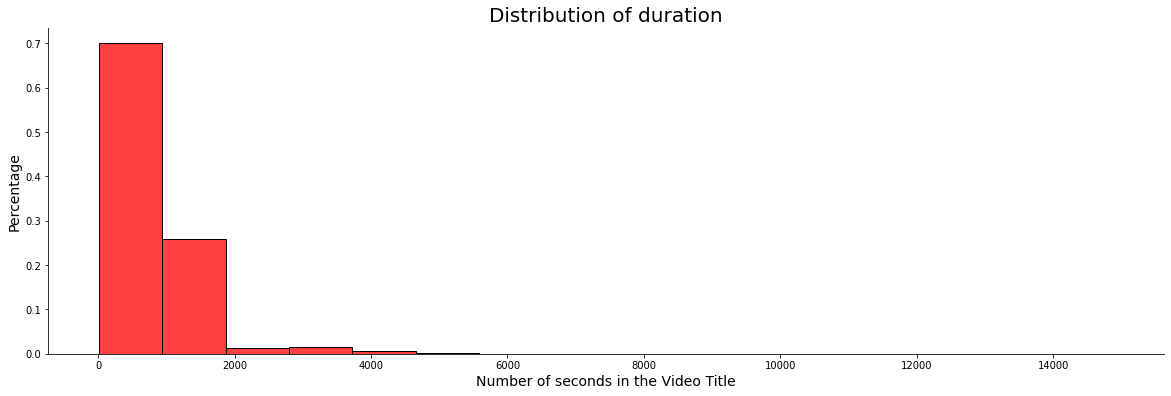

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt 
plt.figure(figsize=(20,6));
ax = sns.histplot(data, x="duration_seconds", stat='probability', bins = 16, color='red')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title("Distribution of duration",fontsize=20);
plt.xlabel("Number of seconds in the Video Title", fontsize=14);
plt.ylabel("Percentage", fontsize=14);

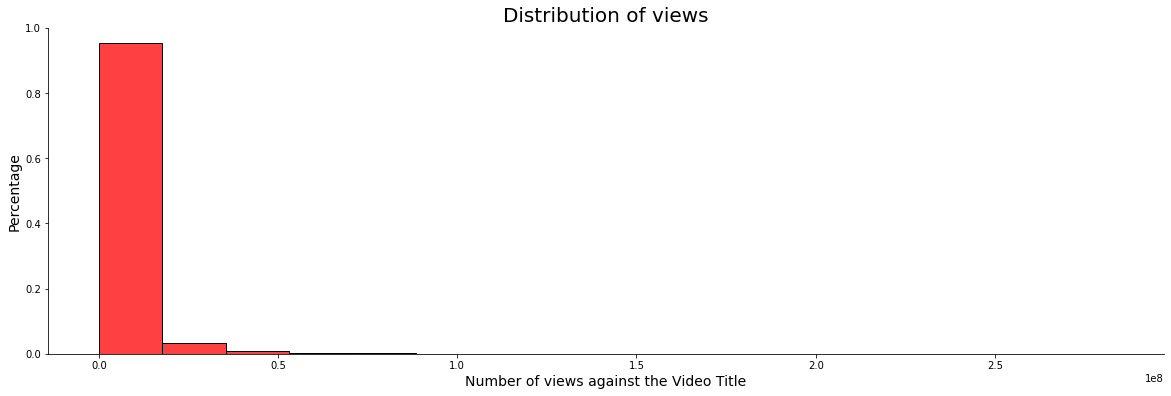

In [8]:
plt.figure(figsize=(20,6));
ax = sns.histplot(data, x="total_views", stat='probability', bins = 16, color='red')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title("Distribution of views",fontsize=20);
plt.xlabel("Number of views against the Video Title", fontsize=14);
plt.ylabel("Percentage", fontsize=14);

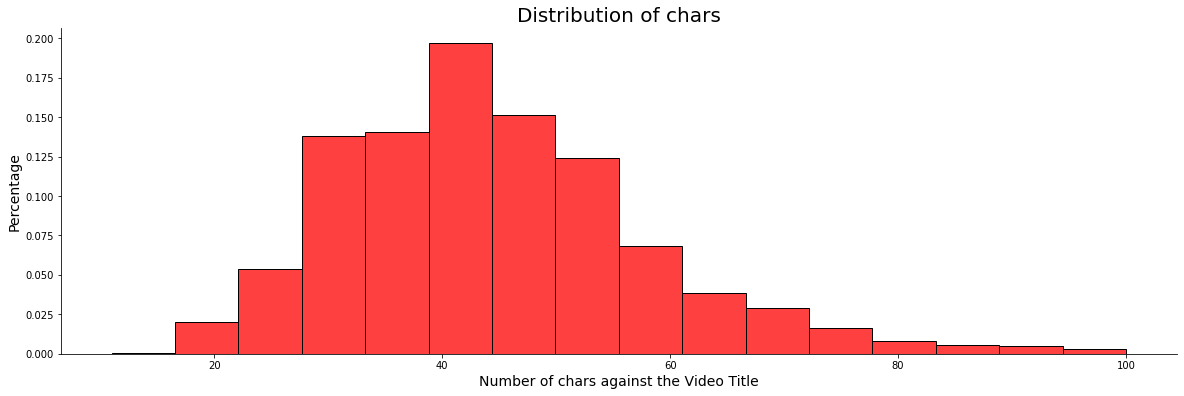

In [9]:
plt.figure(figsize=(20,6));
ax = sns.histplot(data, x="num_chars", stat='probability', bins = 16, color='red')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title("Distribution of chars",fontsize=20);
plt.xlabel("Number of chars against the Video Title", fontsize=14);
plt.ylabel("Percentage", fontsize=14);

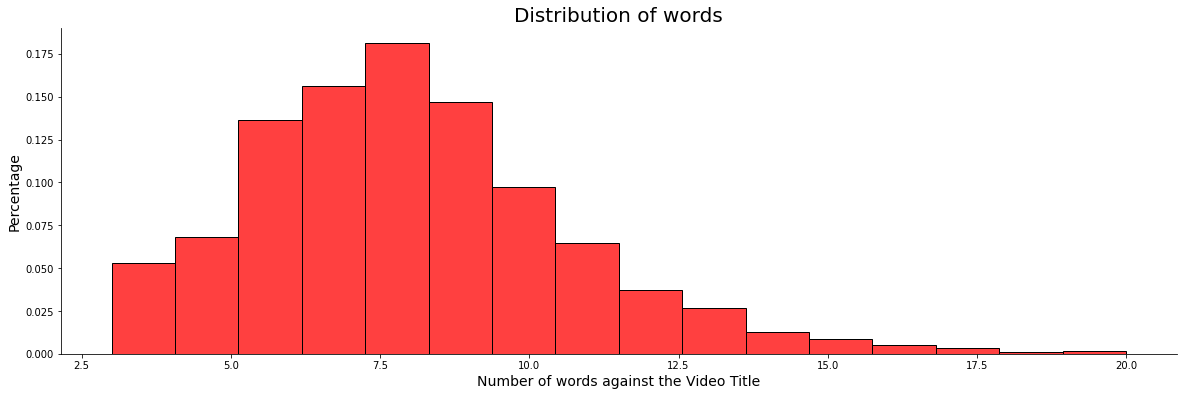

In [10]:
plt.figure(figsize=(20,6));
ax = sns.histplot(data, x="num_words", stat='probability', bins = 16, color='red')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title("Distribution of words",fontsize=20);
plt.xlabel("Number of words against the Video Title", fontsize=14);
plt.ylabel("Percentage", fontsize=14);

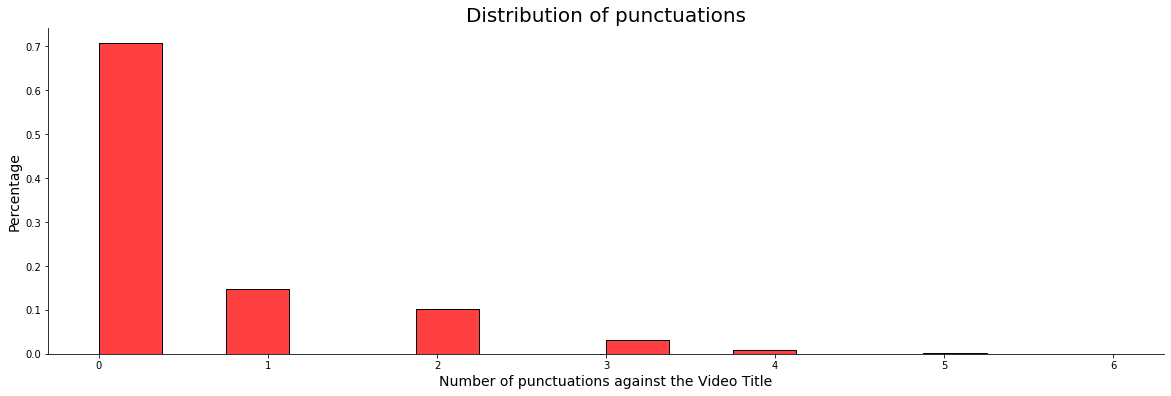

In [11]:
plt.figure(figsize=(20,6));
ax = sns.histplot(data, x="num_punctuation", stat='probability', bins = 16, color='red')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title("Distribution of punctuations",fontsize=20);
plt.xlabel("Number of punctuations against the Video Title", fontsize=14);
plt.ylabel("Percentage", fontsize=14);

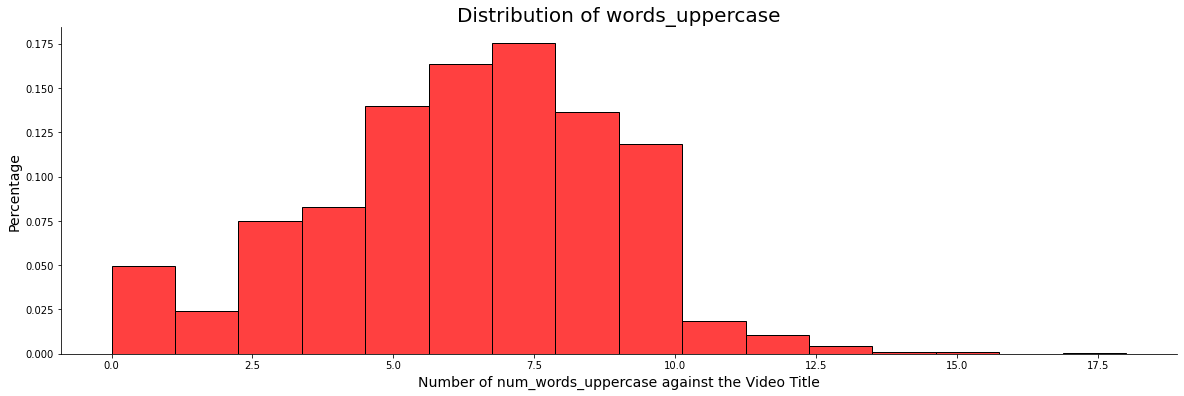

In [12]:
plt.figure(figsize=(20,6));
ax = sns.histplot(data, x="num_words_uppercase", stat='probability', bins = 16, color='red')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title("Distribution of words_uppercase",fontsize=20);
plt.xlabel("Number of num_words_uppercase against the Video Title", fontsize=14);
plt.ylabel("Percentage", fontsize=14);

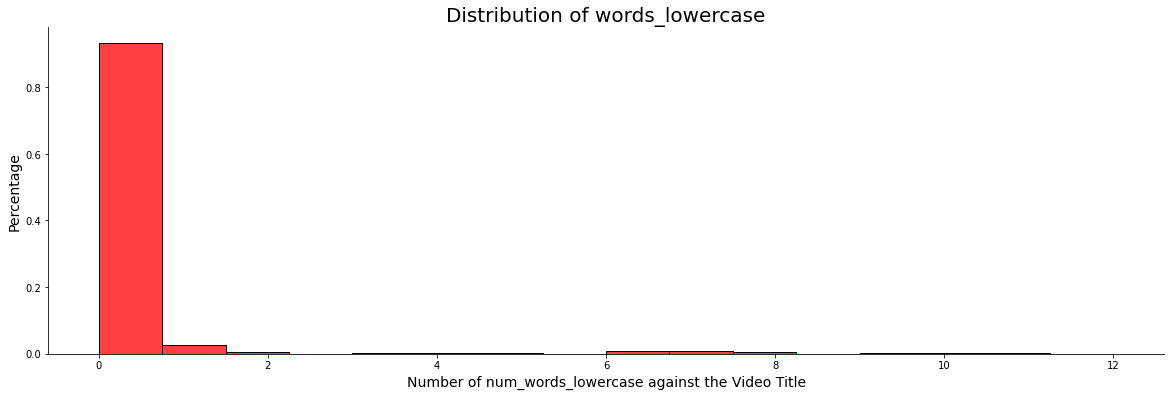

In [13]:
plt.figure(figsize=(20,6));
ax = sns.histplot(data, x="num_words_lowercase", stat='probability', bins = 16, color='red')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title("Distribution of words_lowercase",fontsize=20);
plt.xlabel("Number of num_words_lowercase against the Video Title", fontsize=14);
plt.ylabel("Percentage", fontsize=14);

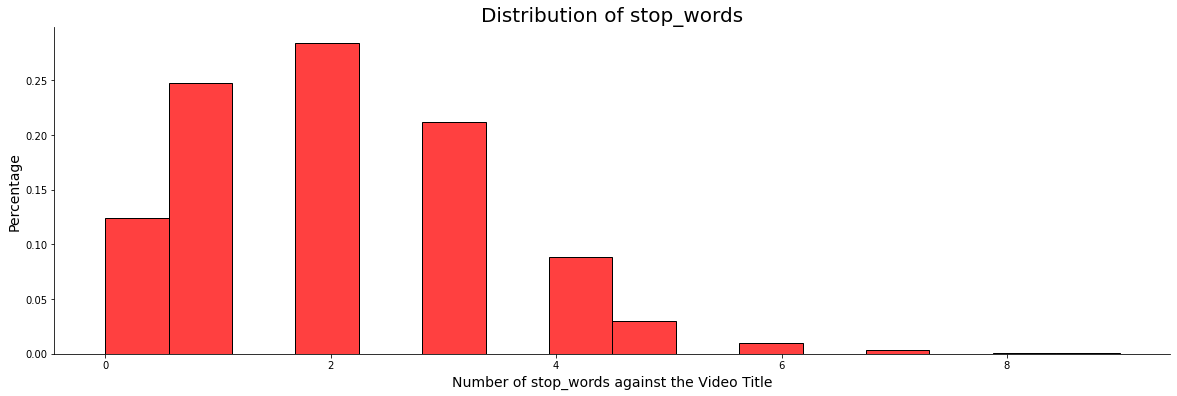

In [14]:
plt.figure(figsize=(20,6));
ax = sns.histplot(data, x="num_stopwords", stat='probability', bins = 16, color='red')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title("Distribution of stop_words",fontsize=20);
plt.xlabel("Number of stop_words against the Video Title", fontsize=14);
plt.ylabel("Percentage", fontsize=14);

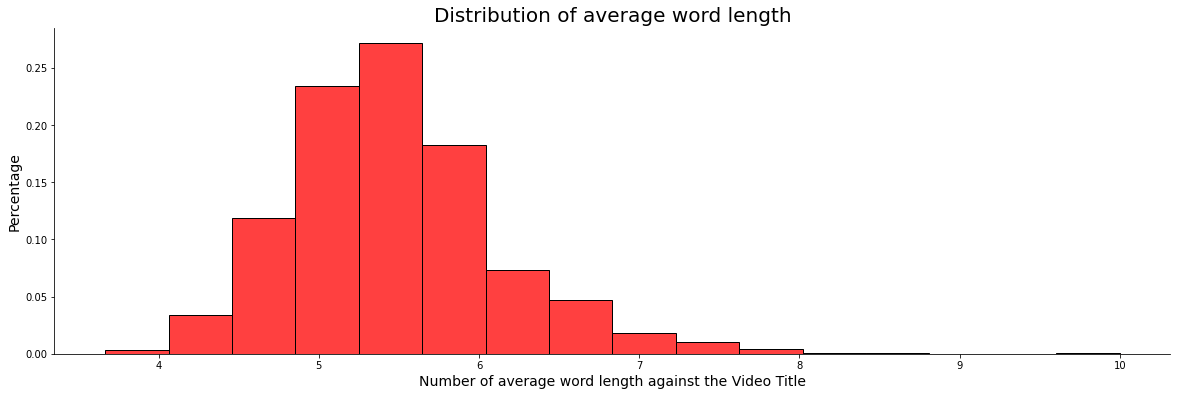

In [15]:
plt.figure(figsize=(20,6));
ax = sns.histplot(data, x="avg_word_len", stat='probability', bins = 16, color='red')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title("Distribution of average word length",fontsize=20);
plt.xlabel("Number of average word length against the Video Title", fontsize=14);
plt.ylabel("Percentage", fontsize=14);

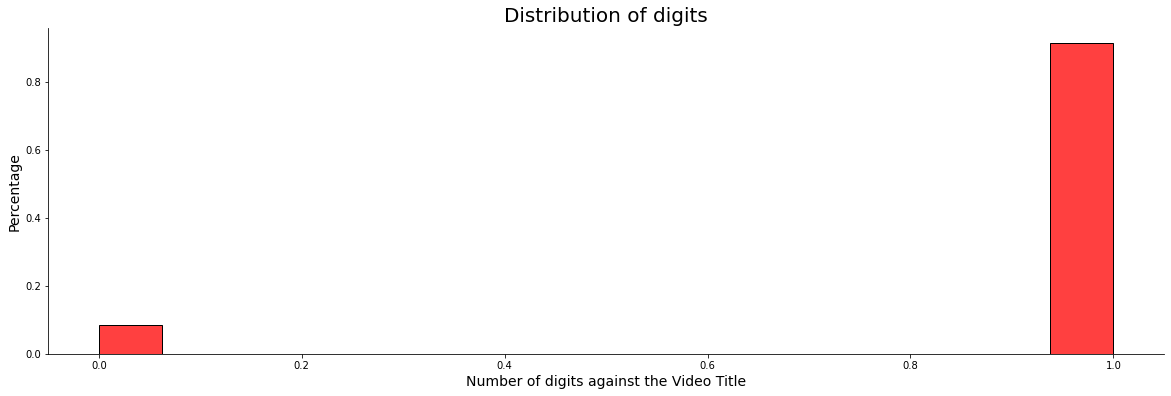

In [16]:
plt.figure(figsize=(20,6));
ax = sns.histplot(data, x="contain_digits", stat='probability', bins = 16, color='red')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title("Distribution of digits",fontsize=20);
plt.xlabel("Number of digits against the Video Title", fontsize=14);
plt.ylabel("Percentage", fontsize=14);

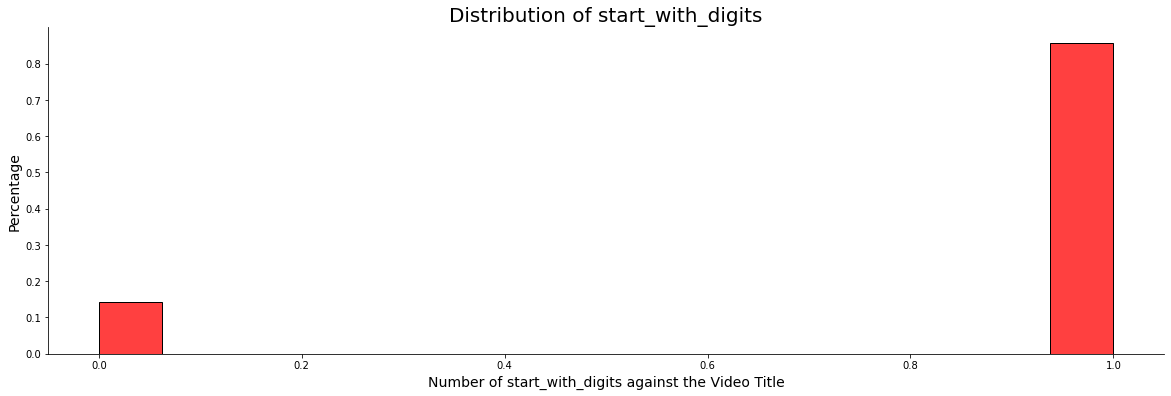

In [17]:
plt.figure(figsize=(20,6));
ax = sns.histplot(data, x="startswith_digits", stat='probability', bins = 16, color='red')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title("Distribution of start_with_digits",fontsize=20);
plt.xlabel("Number of start_with_digits against the Video Title", fontsize=14);
plt.ylabel("Percentage", fontsize=14);

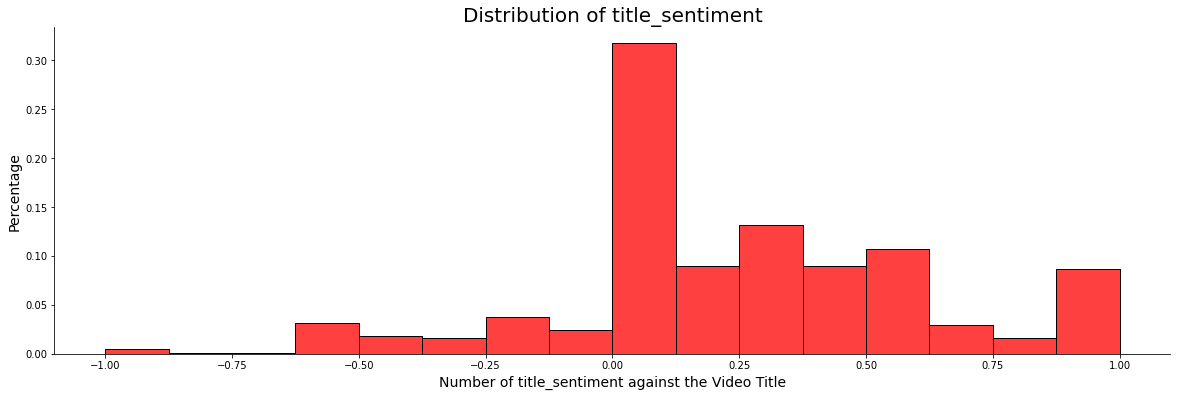

In [18]:
plt.figure(figsize=(20,6));
ax = sns.histplot(data, x="title_sentiment", stat='probability', bins = 16, color='red')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title("Distribution of title_sentiment",fontsize=20);
plt.xlabel("Number of title_sentiment against the Video Title", fontsize=14);
plt.ylabel("Percentage", fontsize=14);

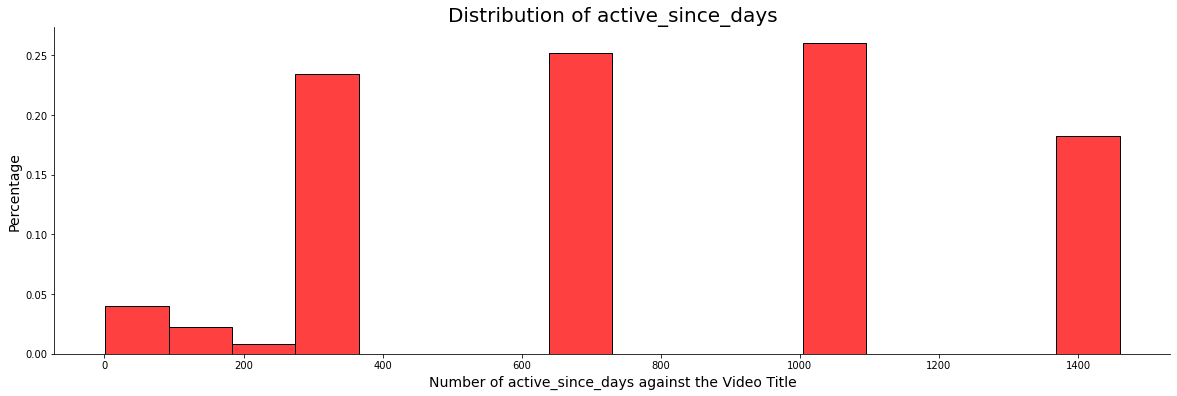

In [19]:
plt.figure(figsize=(20,6));
ax = sns.histplot(data, x="active_since_days", stat='probability', bins = 16, color='red')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title("Distribution of active_since_days",fontsize=20);
plt.xlabel("Number of active_since_days against the Video Title", fontsize=14);
plt.ylabel("Percentage", fontsize=14);

# Let's Visualize correlated features

<AxesSubplot:>

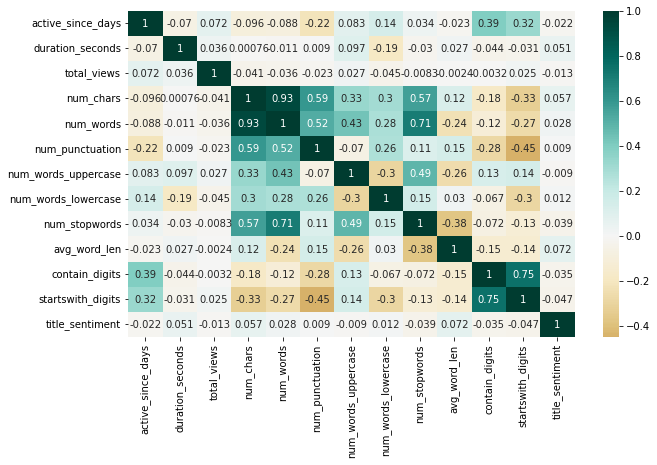

In [20]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(data.corr(), center=0, cmap='BrBG', annot=True)

# Let's visualize the closely collerated ones more closely

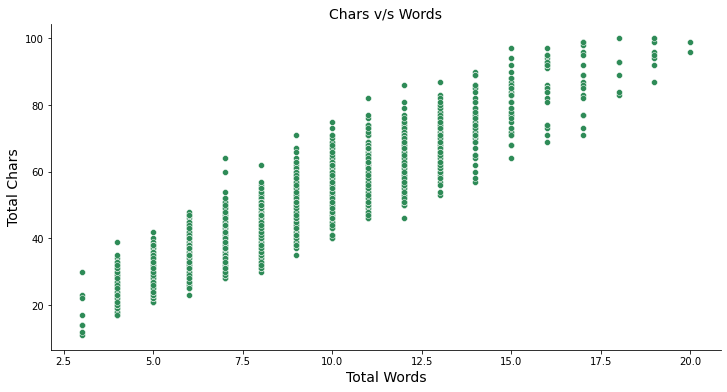

In [21]:
plt.figure(figsize=(12,6));
ax = sns.scatterplot(data=data[data['num_chars'] <500000000], y="num_chars", x='num_words', color='seagreen')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title("Chars v/s Words", fontsize=14);
plt.xlabel("Total Words", fontsize=14);
plt.ylabel("Total Chars", fontsize=14);

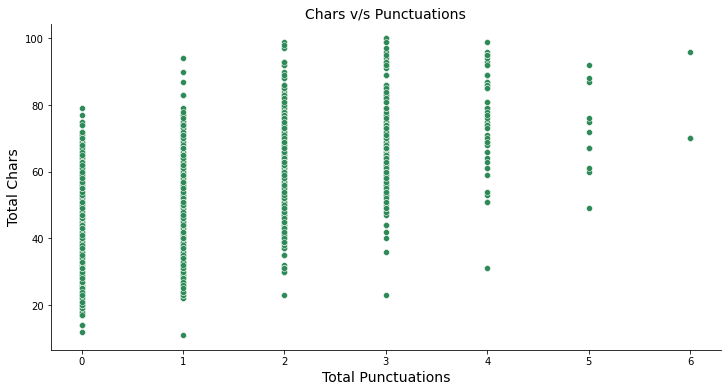

In [22]:
plt.figure(figsize=(12,6));
ax = sns.scatterplot(data=data[data['num_chars'] <500000000], y="num_chars", x='num_punctuation', color='seagreen')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title("Chars v/s Punctuations", fontsize=14);
plt.xlabel("Total Punctuations", fontsize=14);
plt.ylabel("Total Chars", fontsize=14);

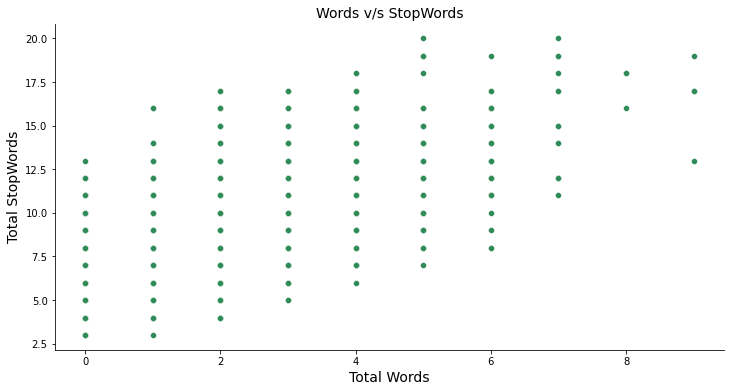

In [23]:
plt.figure(figsize=(12,6));
ax = sns.scatterplot(data=data[data['num_words'] <500000000], y="num_words", x='num_stopwords', color='seagreen')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title("Words v/s StopWords", fontsize=14);
plt.xlabel("Total Words", fontsize=14);
plt.ylabel("Total StopWords", fontsize=14);

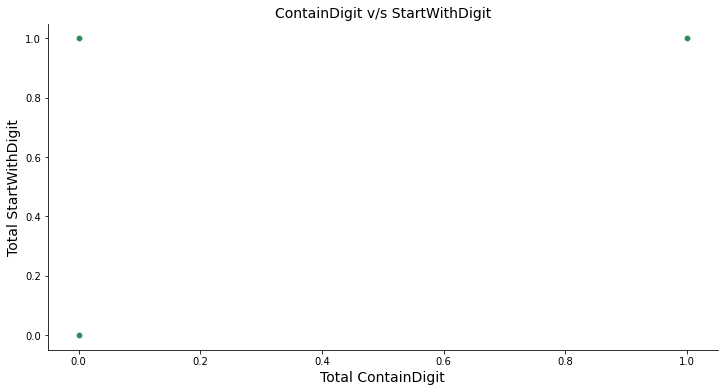

In [26]:
plt.figure(figsize=(12,6));
ax = sns.scatterplot(data=data[data['contain_digits'] <500000000], y="contain_digits", x='startswith_digits', color='seagreen')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title("ContainDigit v/s StartWithDigit", fontsize=14);
plt.xlabel("Total ContainDigit", fontsize=14);
plt.ylabel("Total StartWithDigit", fontsize=14);

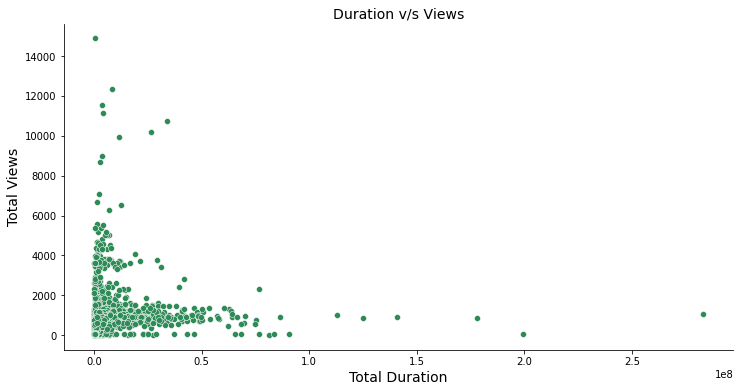

In [25]:
plt.figure(figsize=(12,6));
ax = sns.scatterplot(data=data[data['duration_seconds'] <500000000], y="duration_seconds", x='total_views', color='seagreen')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title("Duration v/s Views", fontsize=14);
plt.xlabel("Total Duration", fontsize=14);
plt.ylabel("Total Views", fontsize=14);

# Please upvote, if you like my work